In [1]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

from asa.plot_methods import plot_contour

In [24]:
plt.style.use('science')
plt.rcParams.update({'font.size': 20})

The data is generated by random walk with no correlation between two steps.

In [25]:
def evolve_step(x):
    N = x.size
    r = np.random.normal(scale=0.1, size=N)
    return x + r

def evolve_nstep(x, n):
    x_history = np.zeros((n + 1, x.size))
    x_history[0] = x
    for i in range(n):
        x_history[i + 1] = evolve_step(x_history[i])
    return x_history

In [26]:
x_int = np.random.uniform(0.3, 0.7, size=10000)
x_history = evolve_nstep(x_int, 100)

Text(0, 0.5, 'x')

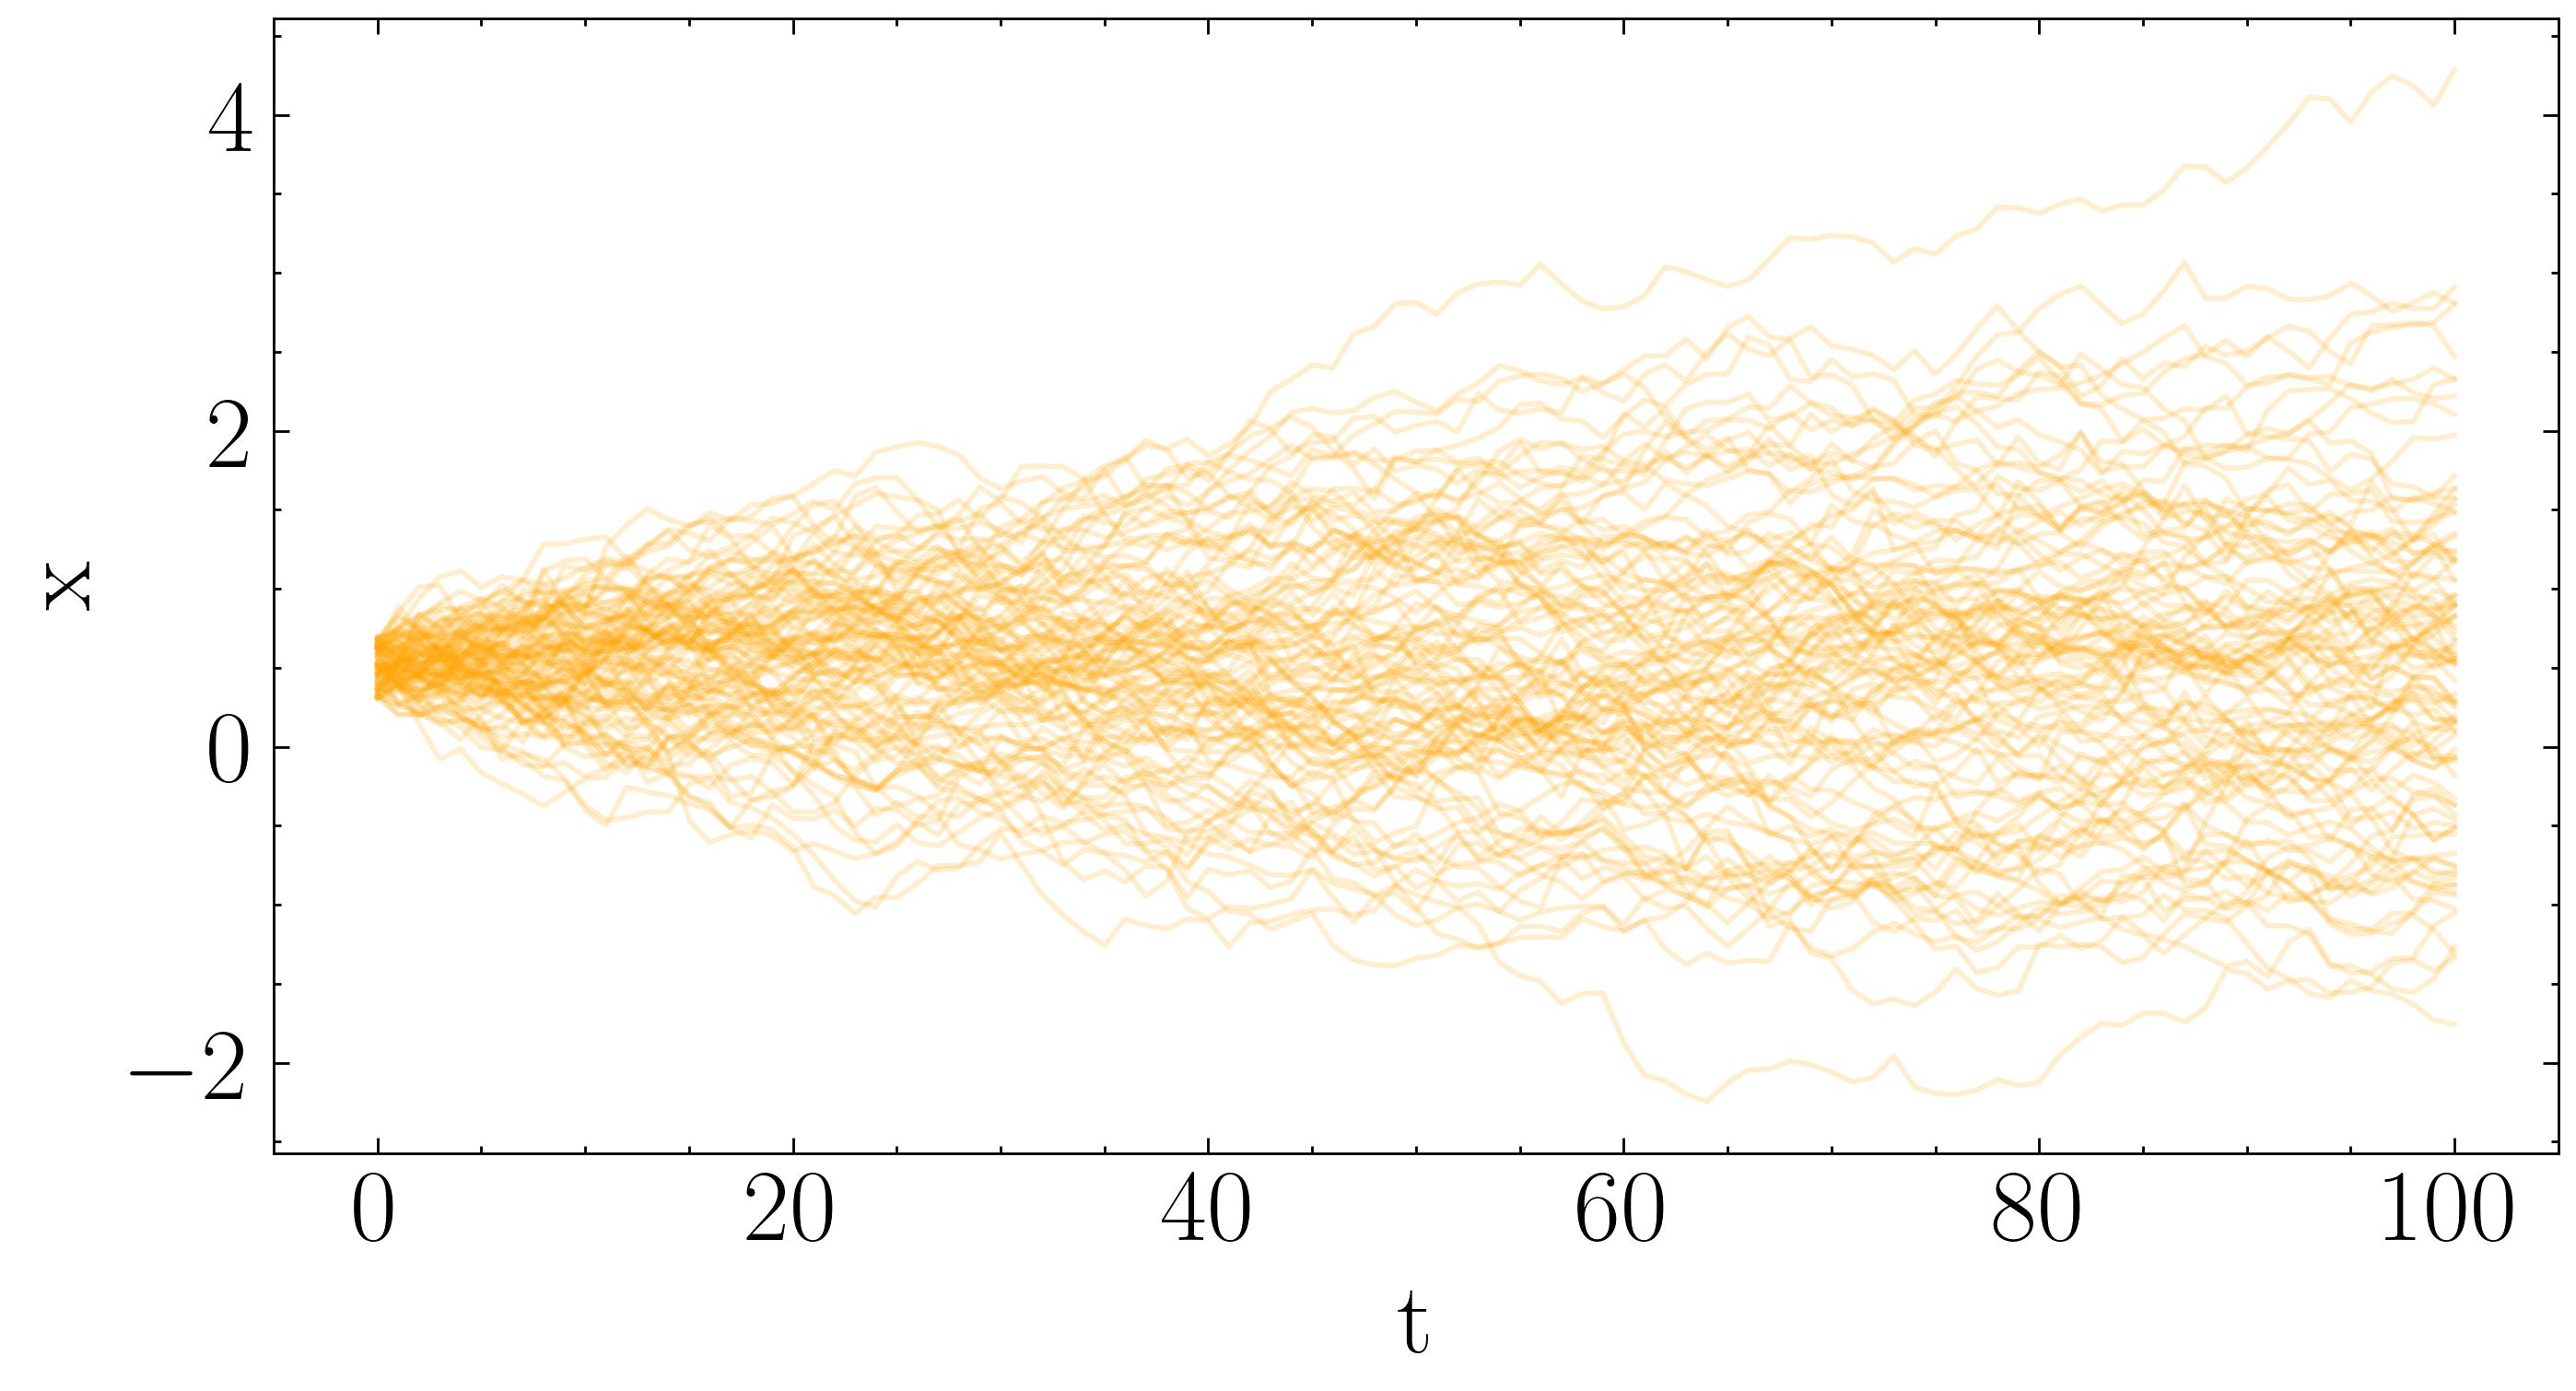

In [27]:
plt.figure(figsize=(8, 4), dpi=400)
plt.plot(np.arange(101), x_history[:, :100], color='orange', alpha=0.2, linewidth=1)

plt.xlabel('t')
plt.ylabel('x')

If you select the walkers with the lowest value at latest step. You will see these walkers tend to decrease in the whole process. 

However, in fact, these walkers actually have no difference.

THIS IS JUST THE SELECTION EFFECT. 

In [10]:
small = x_history[-1,:] < np.percentile(x_history[-1,:], 10)

Text(0, 0.5, 'x')

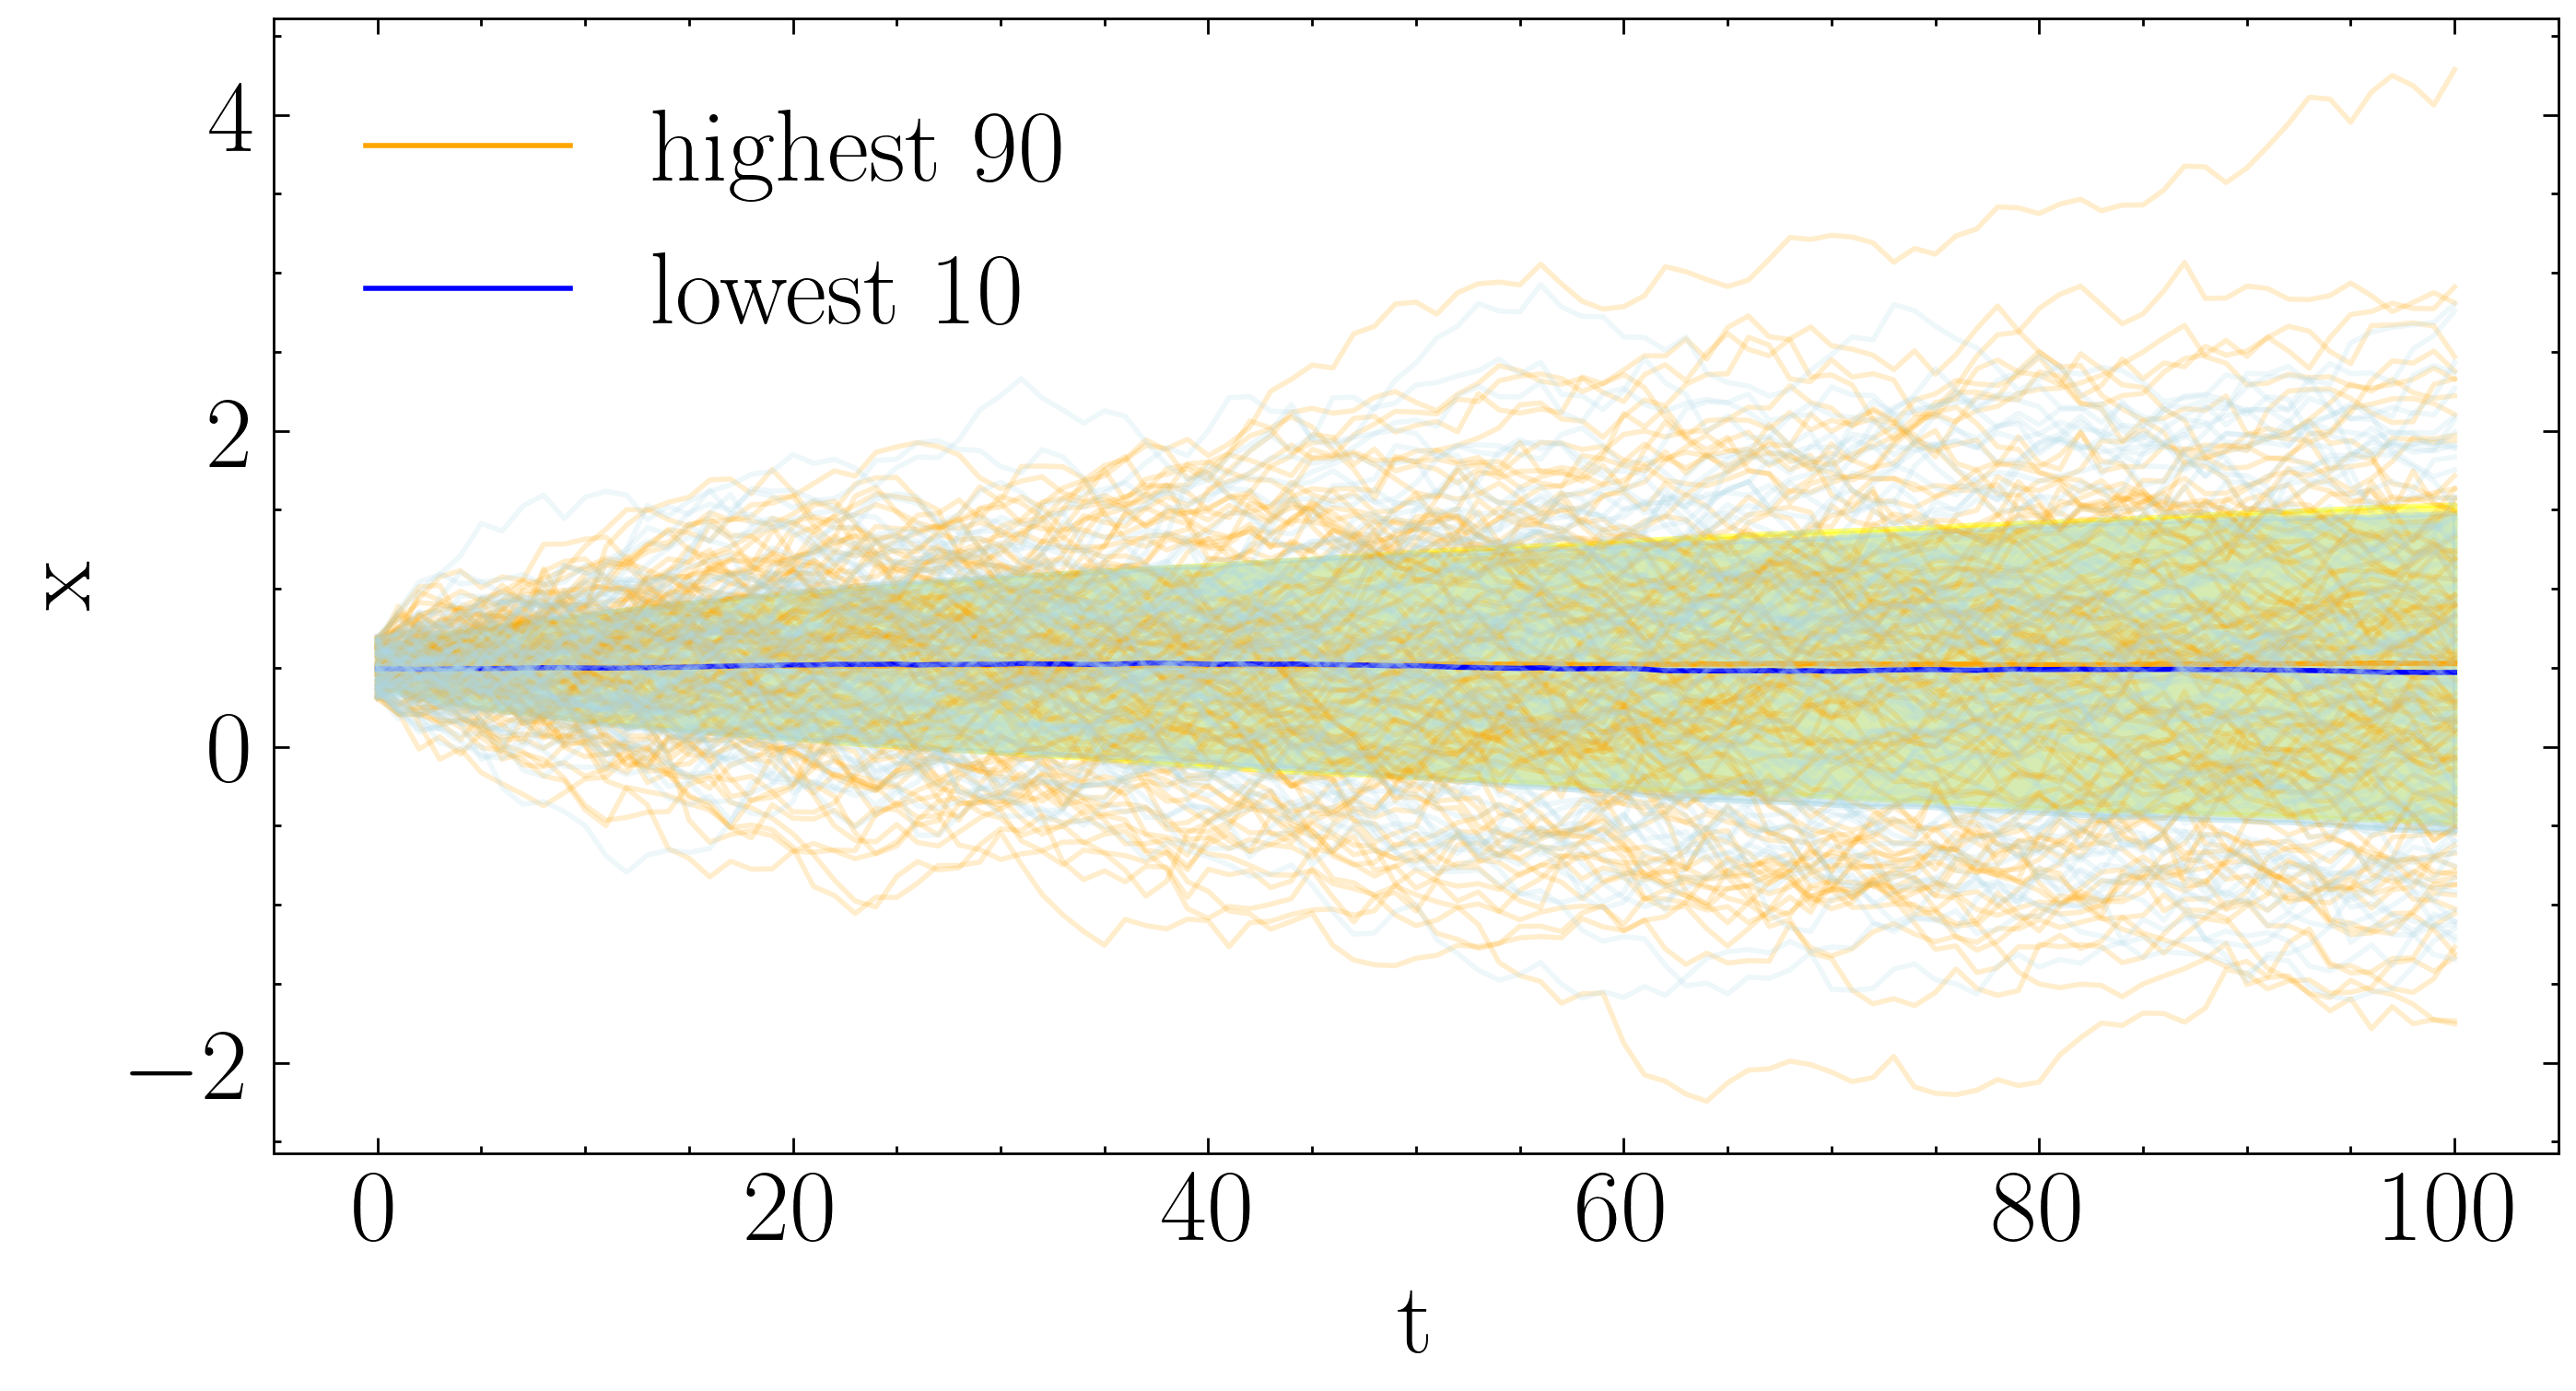

In [28]:
plt.figure(figsize=(8, 4), dpi=400)

plt.plot(np.arange(101), np.mean(x_history[:, ~small], axis=-1), color='orange', label='highest 90% mean')
plt.plot(np.arange(101), x_history[:, ~small][:, :100], color='orange', alpha=0.2, linewidth=1)
plt.fill_between(np.arange(101), np.mean(x_history[:, ~small], axis=-1) - np.std(x_history[:, ~small], axis=-1), np.mean(x_history[:, ~small], axis=-1) + np.std(x_history[:, ~small], axis=-1), color='yellow', alpha=0.5)

plt.plot(np.arange(101), np.mean(x_history[:, small], axis=-1), color='blue', label='lowest 10% mean')
plt.plot(np.arange(101), x_history[:, small][:, :100], color='lightblue', alpha=0.2, linewidth=1)

plt.fill_between(np.arange(101), np.mean(x_history[:, small], axis=-1) - np.std(x_history[:, small], axis=-1), np.mean(x_history[:, small], axis=-1) + np.std(x_history[:, small], axis=-1), color='lightblue', alpha=0.5)

plt.legend()

plt.xlabel('t')
plt.ylabel('x')



If you check the correlation between $x_{t} - x_{t-1}\ vs.\ x_{t}$ or $x_{t} - x_{t-1}\ vs.\ x_{t-1}$, you may think this shows the correlation between the current state and next step.

But in fact, this is just the selection effect.

In [29]:
dx = x_history[1:] - x_history[:-1]
x_t = x_history[1:]
x_tm1 = x_history[:-1]

In [34]:
x_history_noise = np.random.normal(x_history, np.abs(x_history) / 5)
dx_noise = x_history_noise[1:] - x_history_noise[:-1]
x_t_noise = x_history_noise[1:]
x_tm1_noise = x_history_noise[:-1]

Text(0, 0.5, '$x_1 - x_0$')

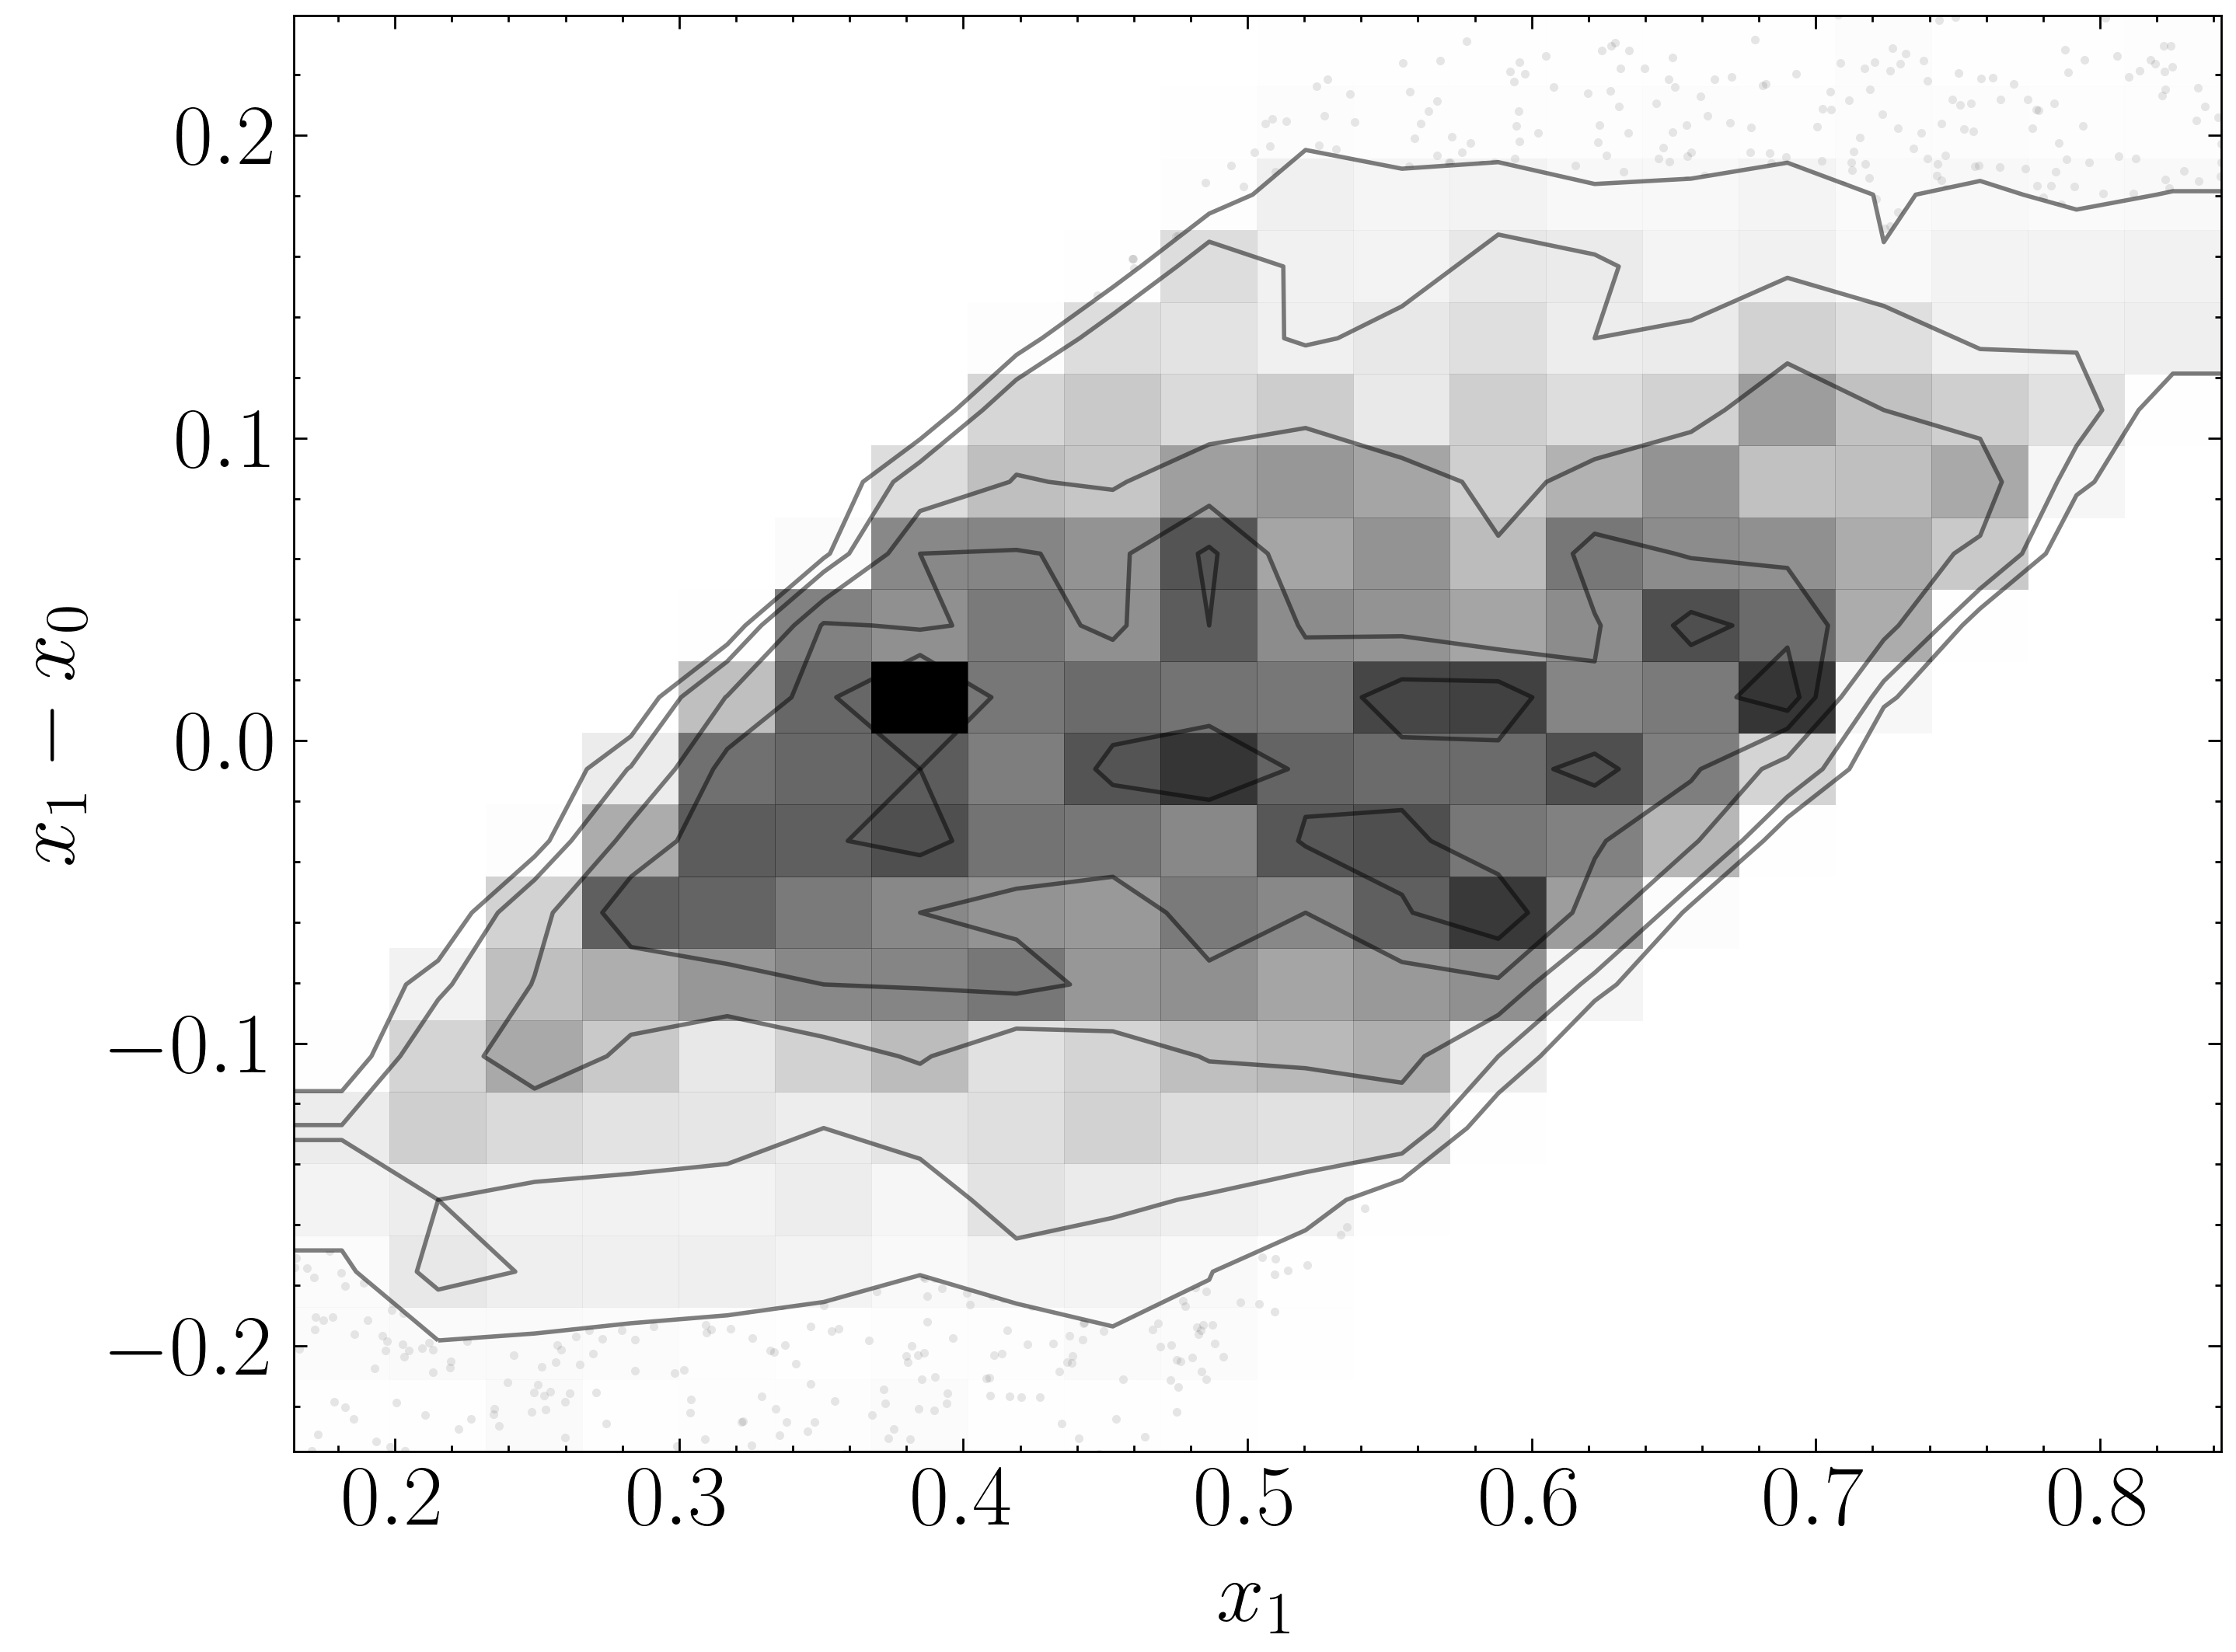

In [30]:
plt.figure(figsize=(8, 6), dpi=400)
plot_contour(x_t[0], dx[0], contour_kwargs={'alpha': 0.5})
plt.xlabel('$x_1$')
plt.ylabel('$x_1 - x_0$')
# pearsonr(x_sub[0], dx[0])

Text(0, 0.5, '$x_2 - x_1$')

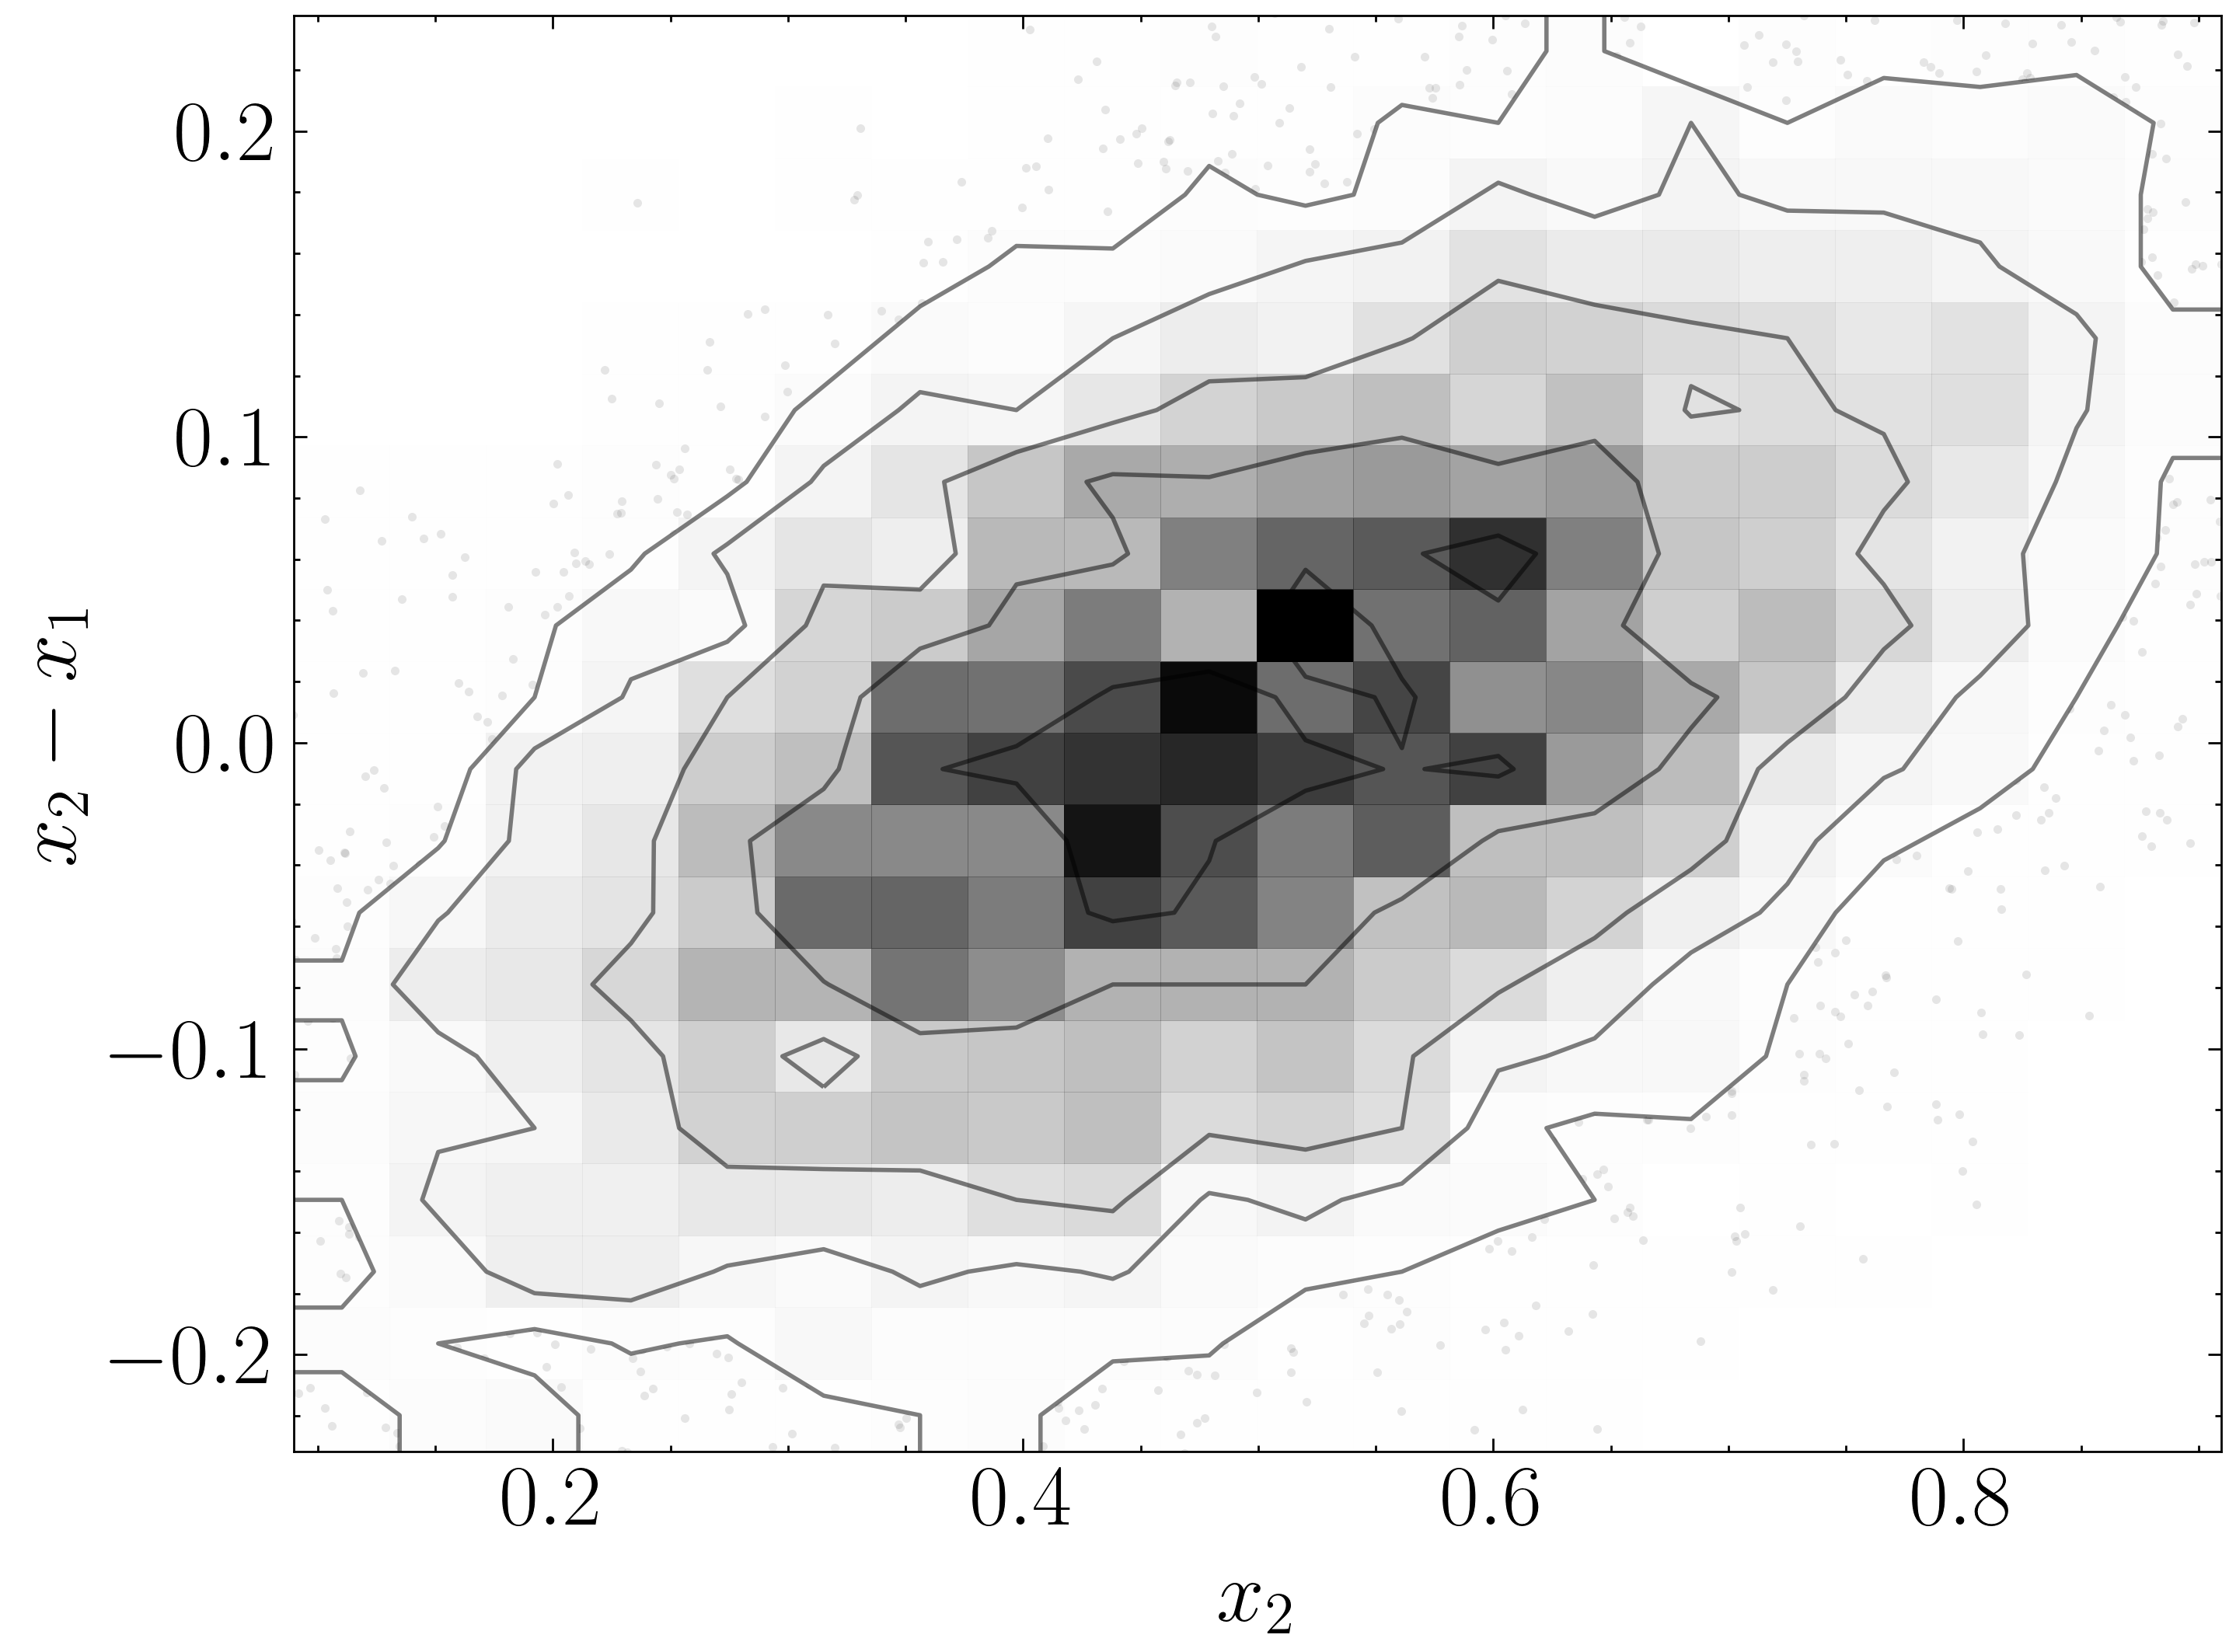

In [31]:
plt.figure(figsize=(8, 6), dpi=400)
plot_contour(x_t[1], dx[1], contour_kwargs={'alpha': 0.5})
plt.xlabel('$x_2$')
plt.ylabel('$x_2 - x_1$')
# pearsonr(x_sub[1], dx[1])

Text(0, 0.5, '$x_2 - x_1$')

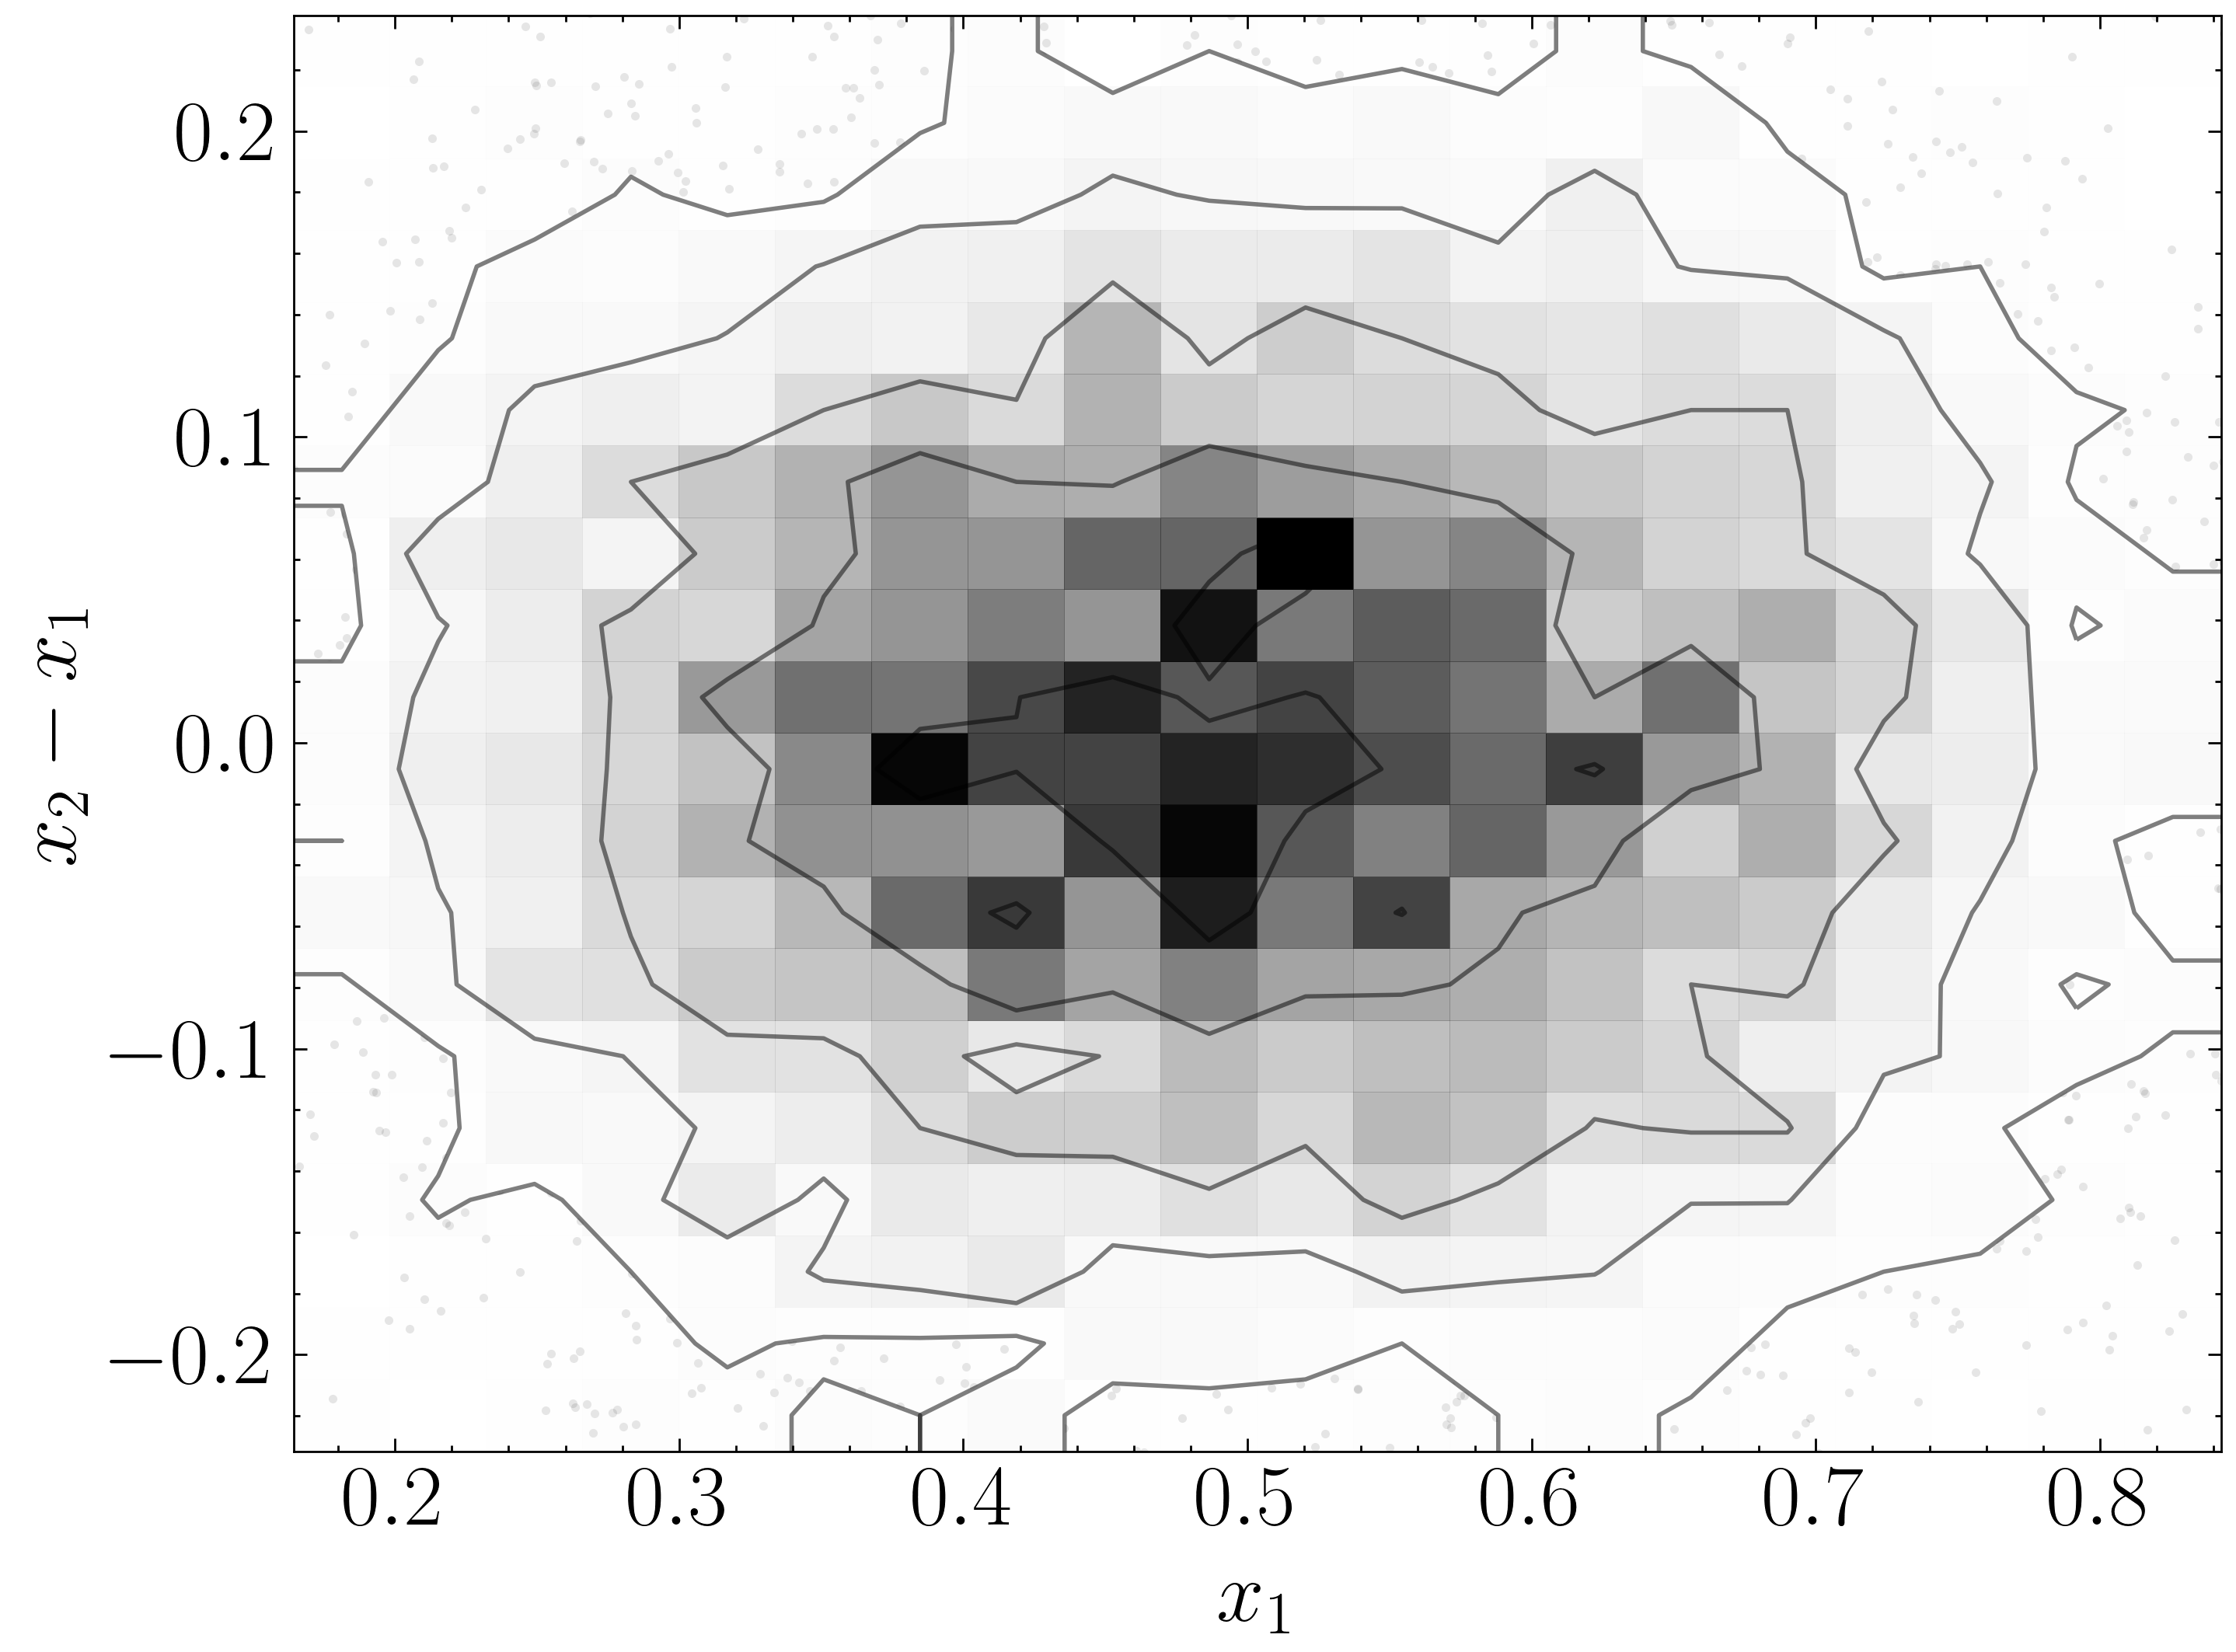

In [32]:
plt.figure(figsize=(8, 6), dpi=400)
plot_contour(x_tm1[1], dx[1], contour_kwargs={'alpha': 0.5})
plt.xlabel('$x_1$')
plt.ylabel('$x_2 - x_1$')

Text(0, 0.5, '$x_2 - x_1$')

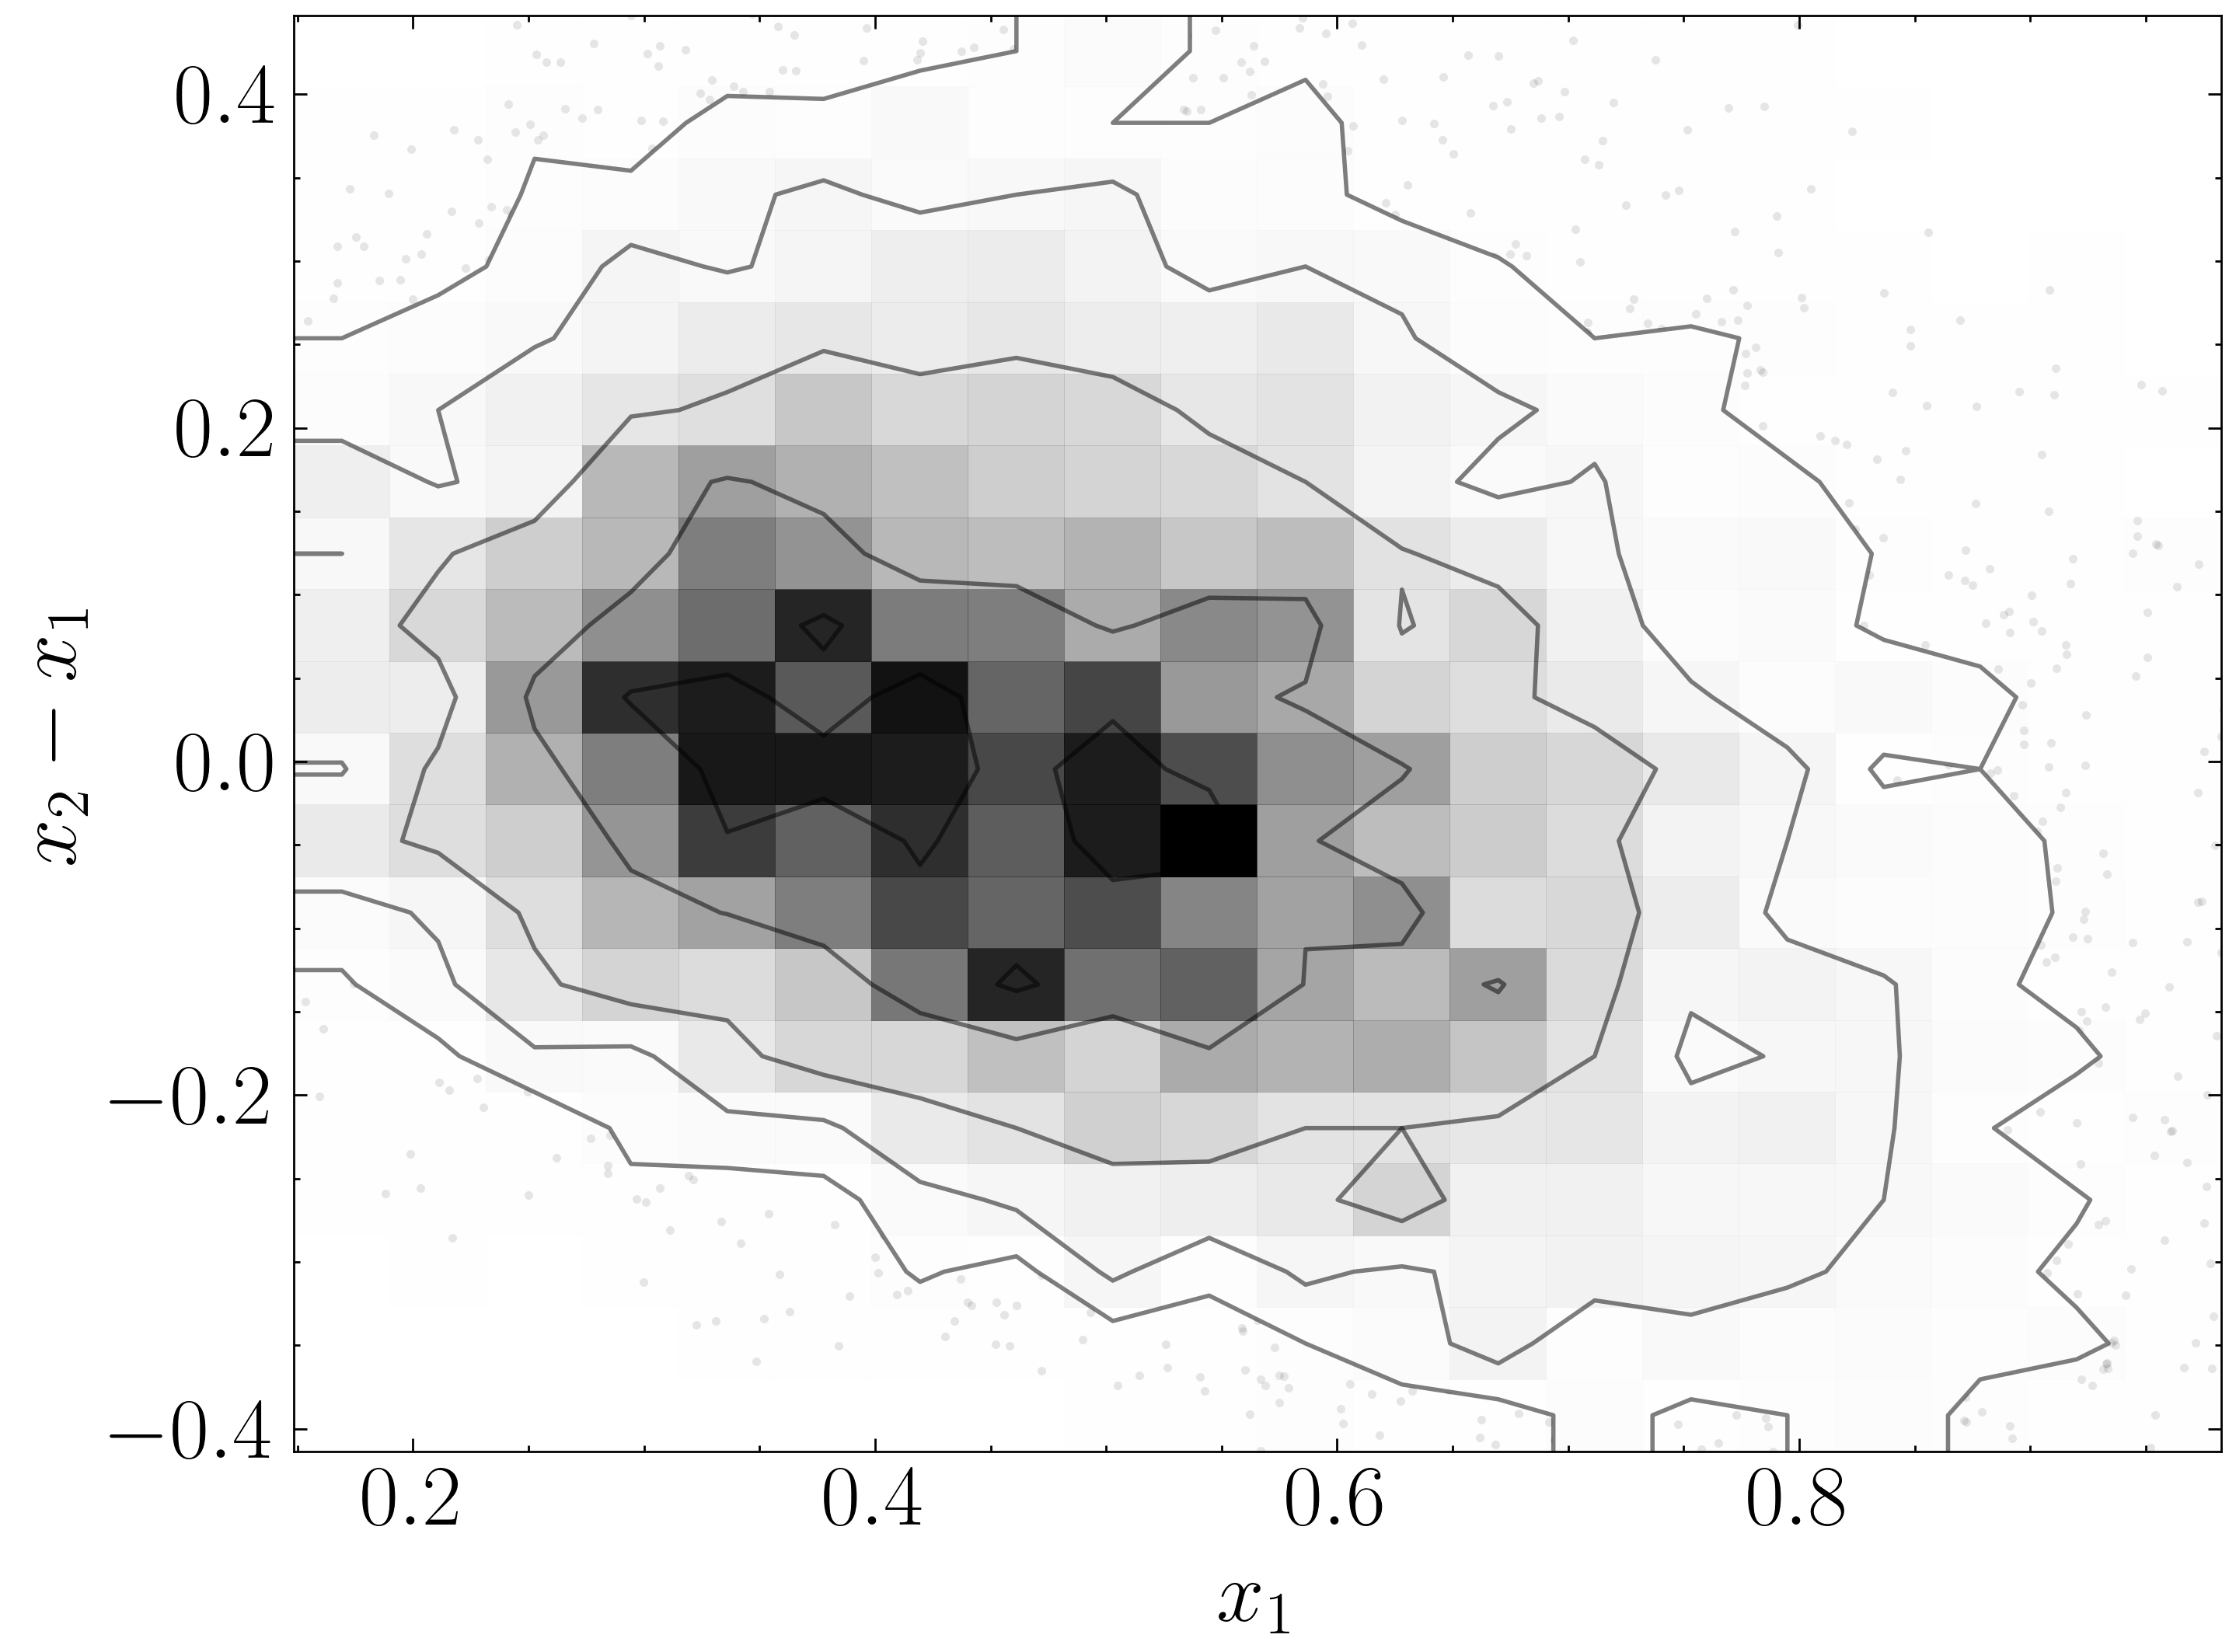

In [35]:
plt.figure(figsize=(8, 6), dpi=400)
plot_contour(x_tm1_noise[1], dx_noise[1], contour_kwargs={'alpha': 0.5})
plt.xlabel('$x_1$')
plt.ylabel('$x_2 - x_1$')